In [24]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
#Initialising convlutional Neuran Network
classifier = Sequential()

In [3]:
# step 1: Convlution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [4]:
# Step 2: Max Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [5]:
# Step 3: A second Convlutional layer
# New layers make the NN deeper and might help improving the accuracy of the NN
classifier.add(Conv2D(32, (3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [6]:
# step 4: Flattening
classifier.add(Flatten())

In [7]:
# step 5: Full connection 
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [8]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
# Fitting CNN to images
from keras_preprocessing.image import ImageDataGenerator

In [10]:
train_data_generator = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [11]:
test_data_generator = ImageDataGenerator(rescale=1./255)

In [12]:
train_set = train_data_generator.flow_from_directory('dataset/training_set', target_size=(64, 64), batch_size=32, 
                                                    class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [13]:
test_set = test_data_generator.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [14]:
classifier.fit_generator(train_set, steps_per_epoch = 8000, epochs = 25, 
                         validation_data = test_set, validation_steps = 2000)


Epoch 1/25
8000/8000 [==============================] - 1641s 205ms/step - loss: 0.3632 - accuracy: 0.8294 - val_loss: 0.4783 - val_accuracy: 0.7929
Epoch 2/25
8000/8000 [==============================] - 1595s 199ms/step - loss: 0.1090 - accuracy: 0.9585 - val_loss: 0.6272 - val_accuracy: 0.7960
Epoch 3/25
8000/8000 [==============================] - 1537s 192ms/step - loss: 0.0528 - accuracy: 0.9811 - val_loss: 0.9808 - val_accuracy: 0.7978
Epoch 4/25
8000/8000 [==============================] - 1529s 191ms/step - loss: 0.0372 - accuracy: 0.9871 - val_loss: 1.9424 - val_accuracy: 0.7990
Epoch 5/25
8000/8000 [==============================] - 1531s 191ms/step - loss: 0.0300 - accuracy: 0.9899 - val_loss: 1.8048 - val_accuracy: 0.7884
Epoch 6/25
8000/8000 [==============================] - 1528s 191ms/step - loss: 0.0248 - accuracy: 0.9916 - val_loss: 0.7226 - val_accuracy: 0.7832
Epoch 7/25
8000/8000 [==============================] - 1529s 191ms/step - loss: 0.0226 - accuracy: 0.992

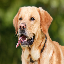

In [34]:
# Single test
import numpy as np
from keras.preprocessing import image
test_img = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_img # or use plt.imshoe(test_img)

In [35]:
def predict_cat_dog(test_img):
    #Convert image to array
    test_img_array = image.img_to_array(test_img)
    # Expand dimensions
    test_img_array_expand = np.expand_dims(test_img_array, axis = 0)
    test_img_array_expand.shape
    y_single_prediction = classifier.predict(test_img_array_expand)
    train_set.class_indices # Dictionary on indeces
    if y_single_prediction[0][0] == 1:
        return 'Dog'
    else:
        return 'Cat'
    
predict_cat_dog(test_img)

'Dog'

In [22]:
import glob as glob
files = glob.glob('dataset/multi_prediction/*.jpg')
files

['dataset/multi_prediction\\cat.4001.jpg',
 'dataset/multi_prediction\\cat.4002.jpg',
 'dataset/multi_prediction\\cat.4003.jpg',
 'dataset/multi_prediction\\cat.4004.jpg',
 'dataset/multi_prediction\\cat.4005.jpg',
 'dataset/multi_prediction\\cat.4006.jpg',
 'dataset/multi_prediction\\cat.4033.jpg',
 'dataset/multi_prediction\\cat.4034.jpg',
 'dataset/multi_prediction\\dog.4001.jpg',
 'dataset/multi_prediction\\dog.4002.jpg',
 'dataset/multi_prediction\\dog.4003.jpg',
 'dataset/multi_prediction\\dog.4004.jpg',
 'dataset/multi_prediction\\dog.4005.jpg',
 'dataset/multi_prediction\\dog.4006.jpg',
 'dataset/multi_prediction\\dog.4007.jpg',
 'dataset/multi_prediction\\dog.4033.jpg',
 'dataset/multi_prediction\\dog.4034.jpg']

<IPython.core.display.Javascript object>


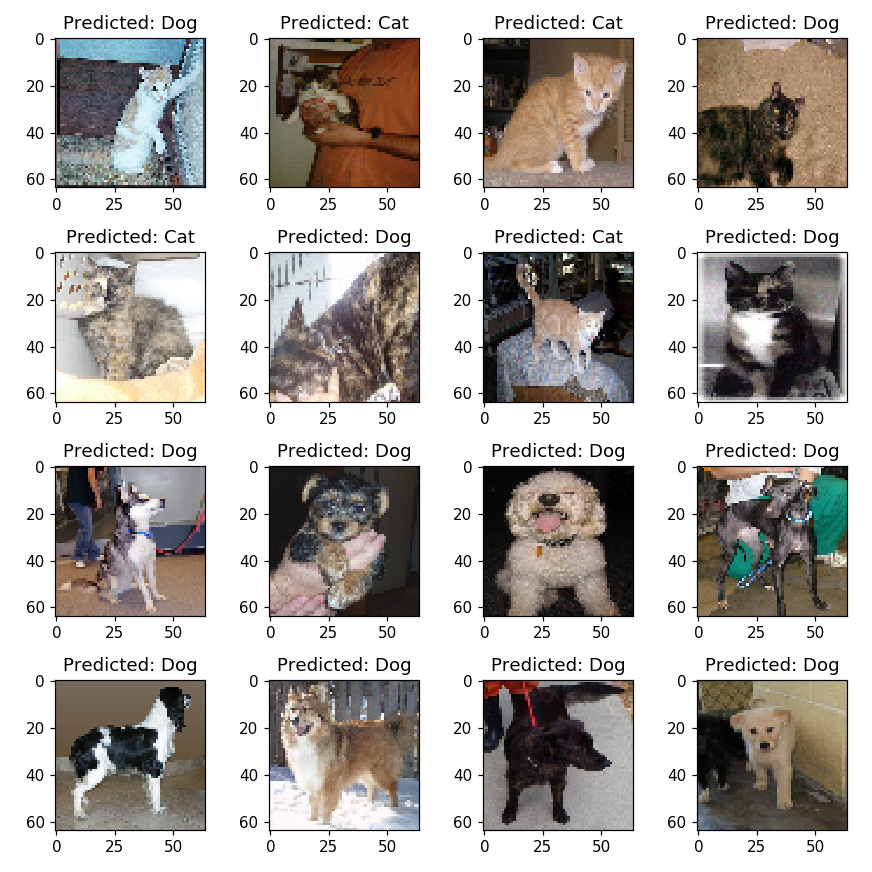

In [36]:
%matplotlib notebook
plt.figure(figsize=(8, 8))

for i in range(16):
    plt.subplot(4, 4, i +1)
    test_img = image.load_img(files[i], target_size = (64, 64))
    plt.imshow(test_img)
    predicted = predict_cat_dog(test_img)
    plt.title('Predicted: ' + predicted)
plt.tight_layout()